In [22]:
import torch
from torch import nn

import numpy as np

from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt

In [23]:
train_data = datasets.EMNIST(root = "data",
                             split = "mnist",
                             train = True,
                             download = True,
                             transform = ToTensor(),
                             target_transform = None)

test_data = datasets.EMNIST(root = "data",
                            split = "mnist",
                            train = False,
                            download = True,
                            transform = ToTensor(),
                            target_transform = None)


In [24]:
len(train_data),len(test_data)

(60000, 10000)

In [25]:
class_names = test_data.classes
class_names

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [26]:
class_to_index = train_data.class_to_idx
class_to_index

{'0': 0,
 '1': 1,
 '2': 2,
 '3': 3,
 '4': 4,
 '5': 5,
 '6': 6,
 '7': 7,
 '8': 8,
 '9': 9}

In [27]:
image , label = train_data[3333]
image.shape , label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, '9')

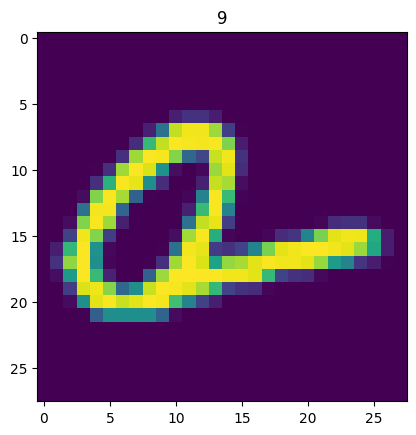

In [28]:
plt.imshow(image.squeeze()) # Question - why using the squeeze function?
plt.title(label)

Text(0.5, 1.0, '9')

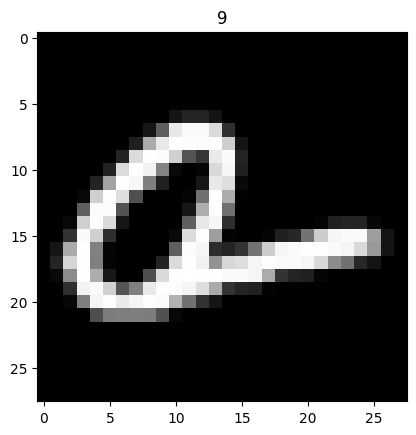

In [29]:
plt.imshow(image.squeeze(),cmap="gray")
plt.title(label)

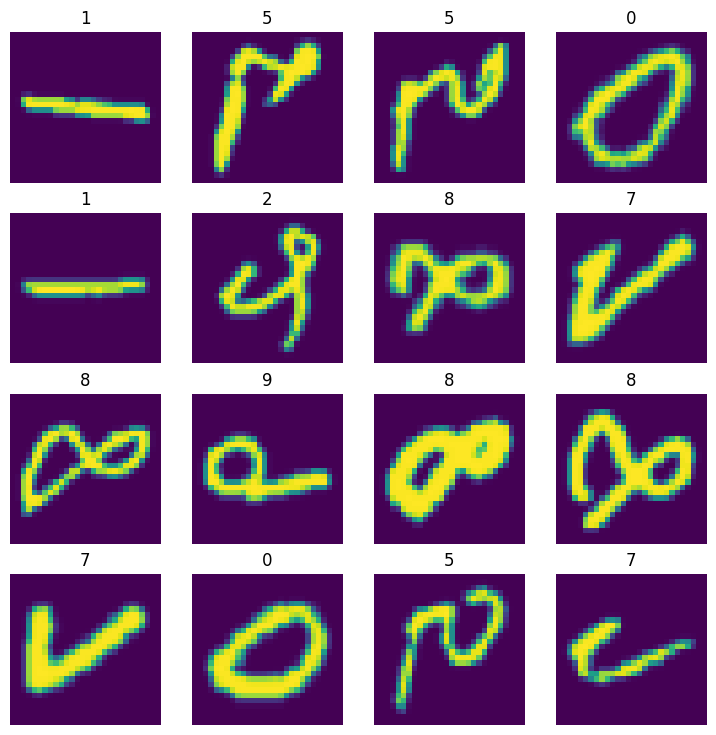

In [30]:
torch.manual_seed(42)

fig = plt.figure(figsize=(9,9))
rows,cols = 4,4

for i in range(1 , rows*cols+1):

  #rnd_idx = torch.randint(0,len(train_data),size=[2,2])
  rnd_idx = torch.randint(0,len(train_data),size = [1]).item()

  img ,label = train_data[rnd_idx]

  fig.add_subplot(rows,cols,i)

  plt.imshow(img.squeeze())

  plt.title(class_names[label])

  plt.axis(False)

In [31]:
BATCH_SIZE = 32
from torch.utils.data import DataLoader

train_dataloader = DataLoader(dataset = train_data ,
                              batch_size = BATCH_SIZE ,
                              shuffle = True)

test_dataloader = DataLoader(dataset = test_data ,
                             batch_size = BATCH_SIZE ,
                             shuffle = False)



32


Text(0.5, 1.0, '0')

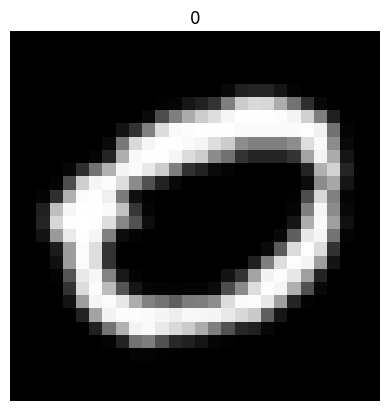

In [32]:
train_features_batch,train_labels_batch = next(iter(train_dataloader))
print(len(train_features_batch))

torch.manual_seed(42)

random_idx = torch.randint(0,len(train_features_batch),size=[1]).item() #Question - what is the parameter size here?

img , label = train_features_batch[random_idx],train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")

plt.axis(False)

plt.title(class_names[label])




In [33]:
flatten_model = nn.Flatten()
x = train_features_batch[0]
output = flatten_model(x)
x.shape , output.shape


(torch.Size([1, 28, 28]), torch.Size([1, 784]))

In [34]:
class EMNIST_0(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int
               ):

    super().__init__()

    self.layer_stack = nn.Sequential(nn.Flatten(),
                                     nn.Linear(in_features=input_shape , out_features=hidden_units),
                                     nn.Linear(in_features=hidden_units , out_features=output_shape))


  def forward(self,x):
    return self.layer_stack(x)



In [35]:
model_0 = EMNIST_0(input_shape = 784, #question - why are we giving 784 as input param here when we already know flatten will make [28,28] to [784]
                   hidden_units = 10,
                   output_shape = len(class_names))



In [36]:
class EMNIST_1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()

    self.block_1 = nn.Sequential(nn.Conv2d(in_channels = input_shape , out_channels = hidden_units , kernel_size = 3 , stride = 1 , padding = 1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units , kernel_size = 3 , stride = 1 , padding = 1),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size = 2 , stride =1))

    self.block_2 = nn.Sequential(nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units , kernel_size = 3 , padding = 1),
                                 nn.ReLU(),
                                 nn.Conv2d(in_channels = hidden_units , out_channels = hidden_units , kernel_size = 3 , padding = 1),
                                 nn.ReLU(),
                                 nn.MaxPool2d(kernel_size = 2))

    self.classifier = nn.Sequential(nn.Flatten(),
                                    nn.Linear(in_features = hidden_units*13*13 , out_features = output_shape))

  def forward(self , x):

    x = self.block_1(x)
    #print("layer_1",x.shape)
    x = self.block_2(x)
    #print("layer_2",x.shape)
    x = self.classifier(x)
    #print("layer_3",x.shape)
    return x



In [37]:
torch.manual_seed(42)
model_1 = EMNIST_1(input_shape = 1 ,
                   hidden_units = 10 ,
                   output_shape = len(class_names))

model_1

EMNIST_1(
  (block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=1690, out_features=10, bias=True)
  )
)

In [38]:
# import requests
# from pathlib import Path

# # Download helper functions from Learn PyTorch repo (if not already downloaded)
# if Path("helper_functions.py").is_file():
#   print("helper_functions.py already exists, skipping download")
# else:
#   print("Downloading helper_functions.py")
#   # Note: you need the "raw" GitHub URL for this to work
#   request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
#   with open("helper_functions.py", "wb") as f:
#     f.write(request.content)

def accuracy_fn(y_true,y_pred):
  correct = torch.eq(y_true, y_pred).sum().item() #Question - what is torch.eq() doing?
  acc=(correct/len(y_pred))*100
  return acc


In [39]:
#(optimizers are used to minimize the loss)
loss_fn = nn.CrossEntropyLoss() # Question - recap for CrossEntropy
optimizer = torch.optim.SGD(params = model_1.parameters() , lr = 0.1) #Question - why S in Gradient descent?



In [40]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):

    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [41]:

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device = 'cpu'):
    train_loss, train_acc = 0, 0
    model.train()   # Question - what does model.train() do? - It has to set two things 1.) Batch Norm , 2.) Dropping Layers - Now what are these?
    for batch, (X, y) in enumerate(data_loader):

        X, y = X.to(device), y.to(device)

        # 1. Forward Pass
        y_pred = model(X)

        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss
        train_acc += accuracy_fn(y_true=y,
                                 y_pred=y_pred.argmax(dim=1)) # Go from logits -> pred labels

        # 3. Optimizer zero grad
        optimizer.zero_grad()  # Question - what is optimizer.zero_grad() and what does it do?

                              # Question - Why is optimizer.zero_grad() befor loss.backward()? - this is

        # 4. Loss backward
        loss.backward()     # Question - what is this loss.backward() - answer - 11 page ka answer hai bhai

        # 5. Optimizer step
        optimizer.step()     # Question -  what does optimizer.step() do - it updates the weight using the type of optimizer being used

    # Calculate loss and accuracy per epoch and print out what's happening
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.5f} | Train accuracy: {train_acc:.2f}%")


def test_step(data_loader: torch.utils.data.DataLoader,
              model: torch.nn.Module,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device = 'cpu'):
    test_loss, test_acc = 0, 0
    model.eval() # Question - why use model.eval()- 3 things written in notes
    with torch.inference_mode(): #Question - what is this torch.inference_mode()
        for X, y in data_loader:
            # Send data to GPU
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred = model(X)

            # 2. Calculate loss and accuracy
            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                y_pred=test_pred.argmax(dim=1) # Go from logits -> pred labels
            )

        # Adjust metrics and print out
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Test loss: {test_loss:.5f} | Test accuracy: {test_acc:.2f}%\n")

In [42]:
torch.manual_seed(42)

from tqdm import tqdm

from timeit import default_timer as timer
train_time_start_model_2=timer()

epochs=3
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n-------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn)
  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn)

train_time_end_model_2=timer()
total_train_time_model_2=print_train_time(start=train_time_start_model_2,
                                          end=train_time_end_model_2)


  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Train loss: 0.34240 | Train accuracy: 89.27%


 33%|███▎      | 1/3 [01:18<02:36, 78.15s/it]

Test loss: 0.09044 | Test accuracy: 97.26%

Epoch: 1
-------
Train loss: 0.08696 | Train accuracy: 97.52%


 67%|██████▋   | 2/3 [02:37<01:19, 79.04s/it]

Test loss: 0.05555 | Test accuracy: 98.27%

Epoch: 2
-------
Train loss: 0.06736 | Train accuracy: 98.00%


100%|██████████| 3/3 [03:57<00:00, 79.30s/it]

Test loss: 0.05251 | Test accuracy: 98.25%

Train time on None: 237.917 seconds


In [43]:
model_1.state_dict()

OrderedDict([('block_1.0.weight',
              tensor([[[[ 0.2533,  0.2028, -0.3914],
                        [ 0.4246, -0.0246,  0.1230],
                        [-0.2153,  0.1920,  0.5648]]],
              
              
                      [[[-0.5721,  0.5296,  0.1317],
                        [ 0.1985,  0.3964,  0.2040],
                        [-0.2349,  0.3180,  0.1120]]],
              
              
                      [[[-0.1895,  0.0466, -0.2035],
                        [-0.0643, -0.1656,  0.1809],
                        [-0.2822, -0.1797, -0.1349]]],
              
              
                      [[[-0.2116,  0.0336, -0.3555],
                        [ 0.3604, -0.2385,  0.2568],
                        [ 0.0513, -0.1365,  0.1757]]],
              
              
                      [[[-0.1458, -0.0546, -0.0755],
                        [ 0.0333,  0.1394, -0.0196],
                        [ 0.1946,  0.3411,  0.3368]]],
              
              
           

In [44]:

torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            # Make predictions with the model
            y_pred = model(X)

            # Accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true=y,
                                y_pred=y_pred.argmax(dim=1)) # For accuracy, need the prediction labels (logits -> pred_prob -> pred_labels)

        # Scale loss and acc to find the average loss/acc per batch
        loss /= len(data_loader)
        acc /= len(data_loader)

    return {"model_name": model.__class__.__name__, # only works when model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}

In [45]:
model_1_result=eval_model(model=model_1,
                          data_loader=test_dataloader,
                          loss_fn=loss_fn,
                          accuracy_fn=accuracy_fn)

model_1_result

100%|██████████| 313/313 [00:06<00:00, 46.31it/s]


{'model_name': 'EMNIST_1',
 'model_loss': 0.05250774323940277,
 'model_acc': 98.25279552715655}

In [46]:
def make_predictions(model: torch.nn.Module,
                      data: list,
                      device: torch.device='cpu'):


   pred_probs=[]
   model.eval()
   with torch.inference_mode():
     for sample in data:
       # Here we unsqueeze and a single image in order to add a batch dimension
       sample=torch.unsqueeze(sample,dim=0)

       # Forward pass(model outputs raw logits)
       pred_logit=model(sample)

       # Converting these logits to prediction probabilities
       pred_prob=torch.softmax(pred_logit.squeeze(),dim=0)

       # Append to the list
       pred_probs.append(pred_prob)
   return torch.stack(pred_probs)


In [47]:
import random
#random.seed(42)
test_samples=[]
test_labels=[]

for sample,label in random.sample(list(test_data),k=9):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

In [48]:
pred_probs=make_predictions(model=model_1,data=test_samples)

pred_probs[:2]

tensor([[3.6233e-10, 4.9171e-06, 5.1006e-08, 4.6873e-09, 9.9991e-01, 2.6481e-09,
         9.7023e-11, 1.1602e-05, 2.1607e-06, 6.6593e-05],
        [8.2707e-05, 1.7996e-08, 9.9989e-01, 2.3820e-05, 5.6297e-08, 6.4552e-10,
         4.9987e-07, 6.9199e-07, 1.3330e-07, 5.5604e-10]])

In [49]:
pred_classes=pred_probs.argmax(dim=1)
pred_classes

tensor([4, 2, 3, 9, 4, 0, 5, 2, 0])

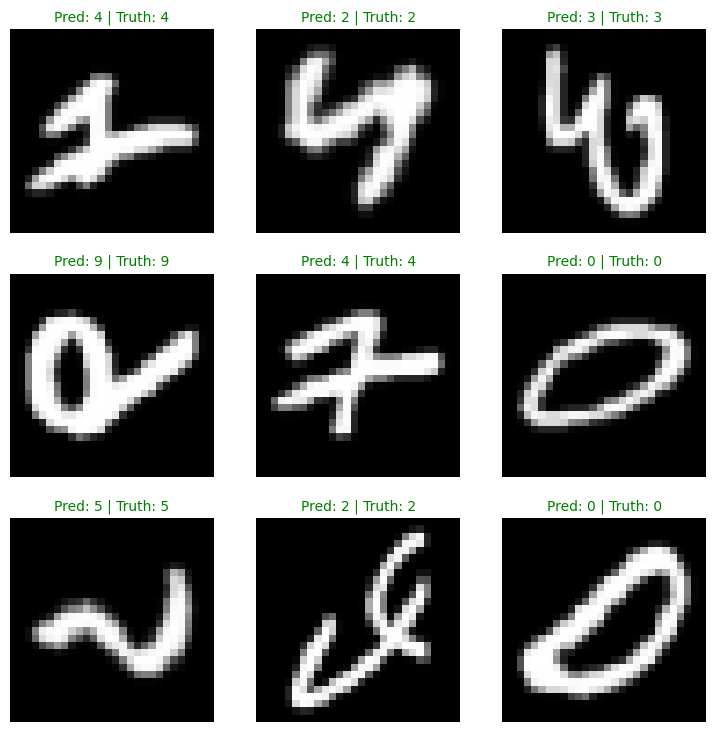

In [50]:
plt.figure(figsize=(9,9))
nrows=3
ncols=3
for i,sample in enumerate(test_samples):

   #create subplots
   plt.subplot(nrows,ncols,i+1)

   #plot target image
   plt.imshow(sample.squeeze(),cmap="gray")

   #prediction in text format
   pred_label=class_names[pred_classes[i]]

   #get the truth label
   truth_label=class_names[test_labels[i]]

   # Create the title text of the plot
   title_text = f"Pred: {pred_label} | Truth: {truth_label}"

   # Check for equality and change title colour accordingly
   if pred_label == truth_label:
      plt.title(title_text, fontsize=10, c="g") # green text if correct
   else:
      plt.title(title_text, fontsize=10, c="r") # red text if wrong
   plt.axis(False);
